# Medical Insurance Cost Analysis and Predictive Modeling

- Author: [Elom Gbogbo](https://github.com/egbogbo11/)
- Repository: [capstone-insurance-costs-predictor](https://github.com/egbogbo11/capstone-insurance-costs-predictor)

## Section 1. Introduction

This project explores the medical insurance dataset from Kaggle, which contains individual-level information such as age, BMI, smoking status, number of children, and region, along with the corresponding insurance charges billed by health providers. The goal of this analysis is to understand the factors that influence insurance costs and to develop data-driven insights that could support pricing decisions, risk assessment, and predictive modeling.

Throughout the notebook, I work through a full analytics workflow: preparing and cleaning the data, performing exploratory data analysis, examining relationships between variables, and building models that help explain and predict insurance charges. Each step is designed to demonstrate practical analytical skills while also highlighting meaningful patterns within the dataset.

By the end of this project, the analysis provides a clear overview of how demographic and lifestyle characteristics contribute to medical insurance expenses and offers a foundation for more advanced predictive work.

## Section 2. Imports



In [649]:
# This is a Python cell. Imports go at the top.

import pandas as pd
import numpy as np
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


## 3. Data Import and Initial Review

In [650]:
# Load the dataset
df = pd.read_csv('../data/insurance.csv')

# Shape of the dataset
print(df.shape)  # (1338, 7)


(1338, 7)


In [651]:
# Preview of the dataset
display(df.head(10))

# Data types and non-null counts
df.info()

# Descriptive statistics for numerical features
display(df.describe())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [652]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())



Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicate Rows:
1


## 4. Data Description

This analysis uses the Medical Insurance Cost dataset, a commonly used dataset in data analytics and machine learning projects. It contains demographic, lifestyle, and health-related information used to predict individual medical insurance charges. The data originate from an open-source collection available through Kaggle and other educational repositories designed for regression and exploratory data analysis exercises.

The dataset includes approximately **1,338 rows** and **7 columns** (attributes):

| Column | Type | Description | Values/Range |
|---------|------|-------------|--------------|
| `age` | numeric (int) | Age of the primary insurance beneficiary in years. | 18-64 years |
| `sex` | categorical | Gender of the insurance contractor (*male* or *female*). | male, female |
| `bmi` | numeric (float) | Body Mass Index, calculated as weight in kg / (height in m)². Provides understanding of body weight relative to height. | 15.96-53.13 |
| `children` | numeric (int) | Number of dependents (children) covered by the insurance plan. | 0-5 |
| `smoker` | categorical | Smoking status of the beneficiary (*yes* or *no*). | yes, no |
| `region` | categorical | Geographic region of beneficiary's residence in the US (*northeast*, *northwest*, *southeast*, or *southwest*). | northeast, northwest, southeast, southwest |
| `charges` | numeric (float) | Individual medical costs billed by health insurance in US dollars. **This is the target variable.** | $1,121.87-$63,770.43 |

### Notes
- The dataset contains a mix of categorical and numeric features, making it well-suited for regression and exploratory data analysis.
- It includes a clearly defined target variable, charges, which is commonly used for predictive modeling.
- The dataset is already clean and well-structured, requiring minimal preprocessing before analysis.

## 5. Data Cleaning and Preprocessing

In [653]:
print("\nDuplicate Rows:")
print(df.duplicated().sum())
df[df.duplicated()]

# Remove duplicates
df = df.drop_duplicates()

print("\nDuplicate Rows After Removal:")
print(df.duplicated().sum())


Duplicate Rows:
1

Duplicate Rows After Removal:
0


In [654]:
# Standardize column names (lowercase, underscores)
df.columns = df.columns.str.lower().str.replace(' ', '_')
print("Column names after standardization:")
print(df.columns.tolist())


Column names after standardization:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [655]:
# Validate data types
print("\nData Types:")
print(df.dtypes)



Data Types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [656]:
# Save cleaned dataset for later use
df.to_csv('../data/insurance_clean.csv', index=False)


## 6. Exploratory Data Analysis (EDA)

### 6.1 Numerical Columns

In [657]:
numeric_cols = ['age', 'bmi', 'children', 'charges']


In [658]:
# 1) Summary statistics for numerical columns
print(df[numeric_cols].describe().T)


           count          mean           std        min       25%        50%  \
age       1337.0     39.222139     14.044333    18.0000    27.000    39.0000   
bmi       1337.0     30.663452      6.100468    15.9600    26.290    30.4000   
children  1337.0      1.095737      1.205571     0.0000     0.000     1.0000   
charges   1337.0  13279.121487  12110.359656  1121.8739  4746.344  9386.1613   

                  75%          max  
age          51.00000     64.00000  
bmi          34.70000     53.13000  
children      2.00000      5.00000  
charges   16657.71745  63770.42801  


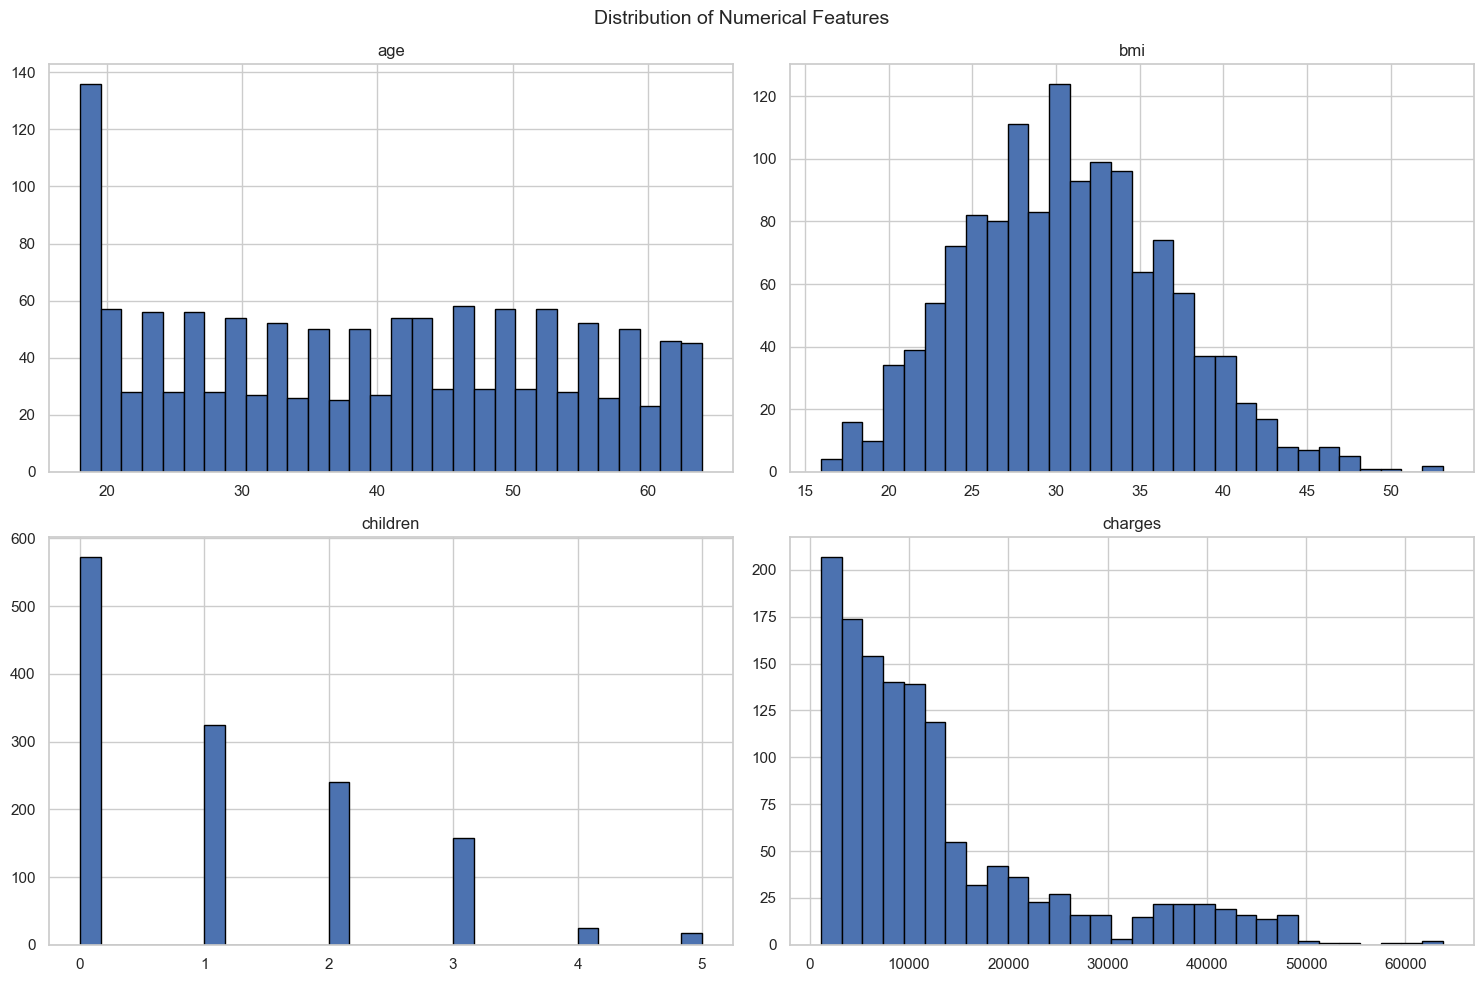

In [659]:
df[numeric_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

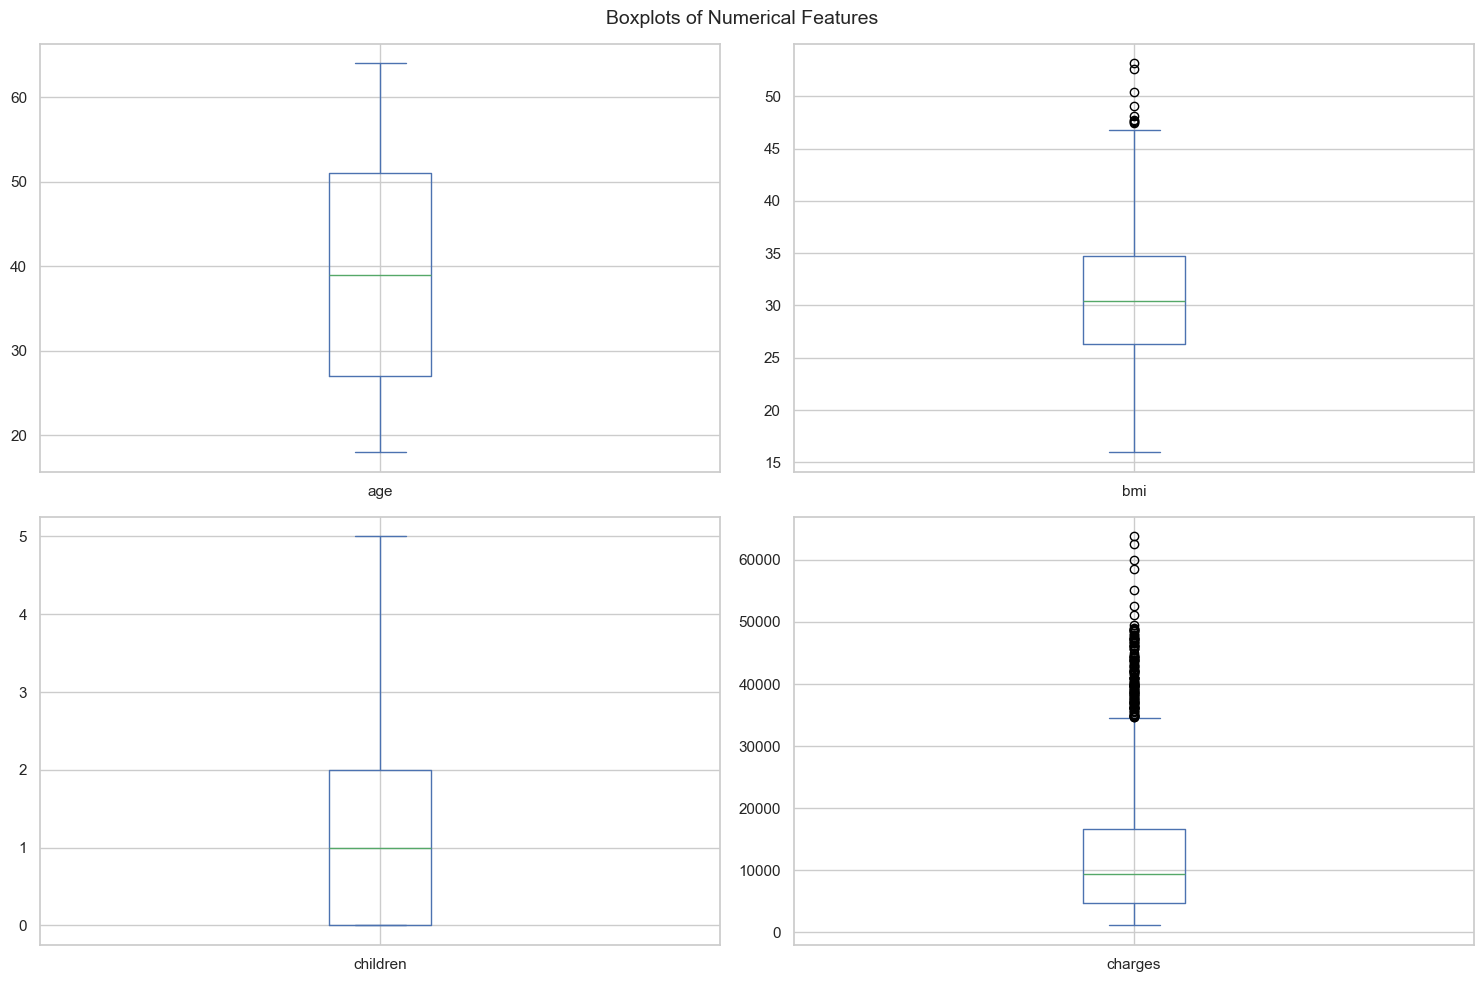

In [660]:
df[numeric_cols].plot(kind='box', subplots=True, layout=(2, 2), figsize=(15, 10))
plt.suptitle("Boxplots of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()


Number of potential outliers in charges: 139


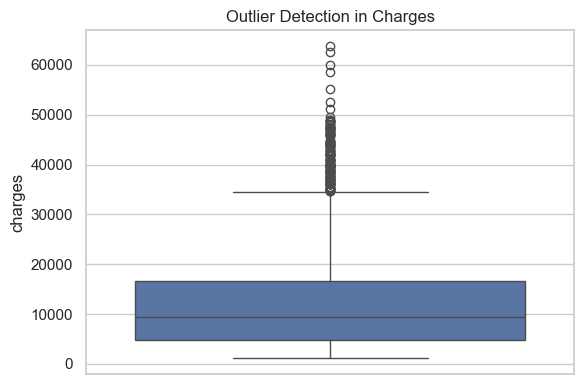

In [661]:
# Outlier detection for charges using IQR
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
print(f"Number of potential outliers in charges: {len(outliers)}")

plt.figure(figsize=(6, 4))
sns.boxplot(y='charges', data=df)
plt.title("Outlier Detection in Charges")
plt.tight_layout()
plt.show()

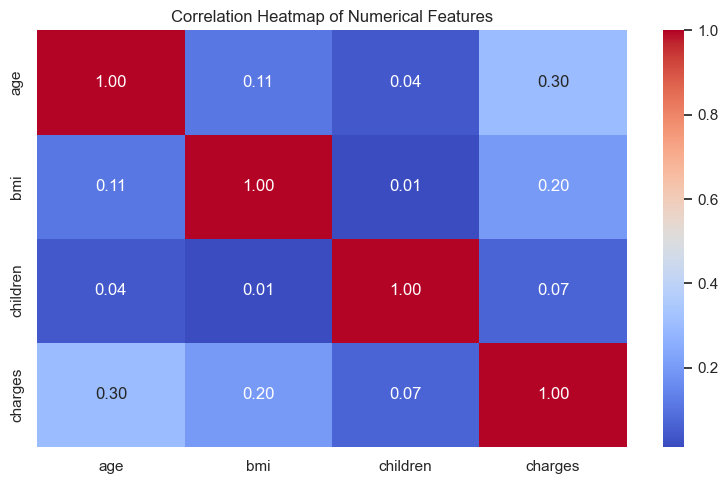

In [662]:
# Correlation heatmap
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

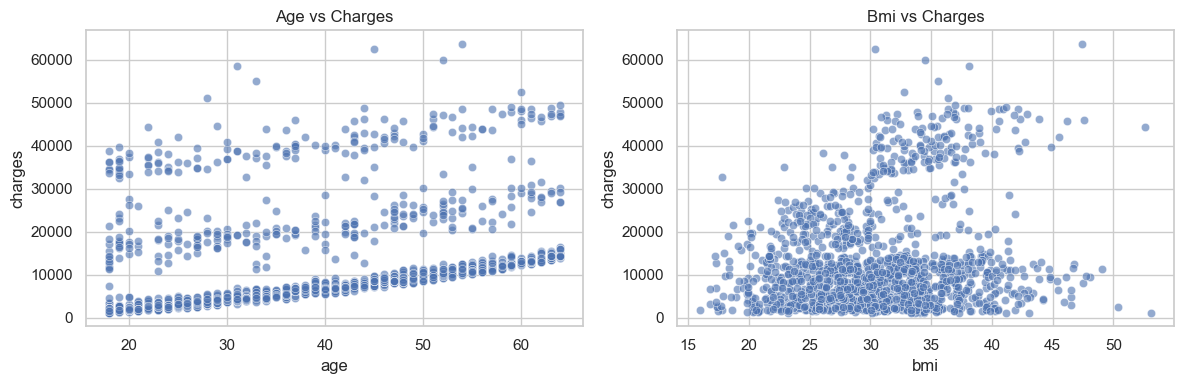

In [663]:
# Scatterplots: age & BMI vs charges
plt.figure(figsize=(12, 4))
for i, col in enumerate(['age', 'bmi'], 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(x=col, y='charges', data=df, alpha=0.6)
    plt.title(f"{col.capitalize()} vs Charges")
plt.tight_layout()
plt.show()

### 6.2 Categorical Features

In [664]:
categorical_cols = ['sex', 'smoker', 'region']

In [665]:
# Categorical columns
print(df[categorical_cols].describe().T)

       count unique        top  freq
sex     1337      2       male   675
smoker  1337      2         no  1063
region  1337      4  southeast   364


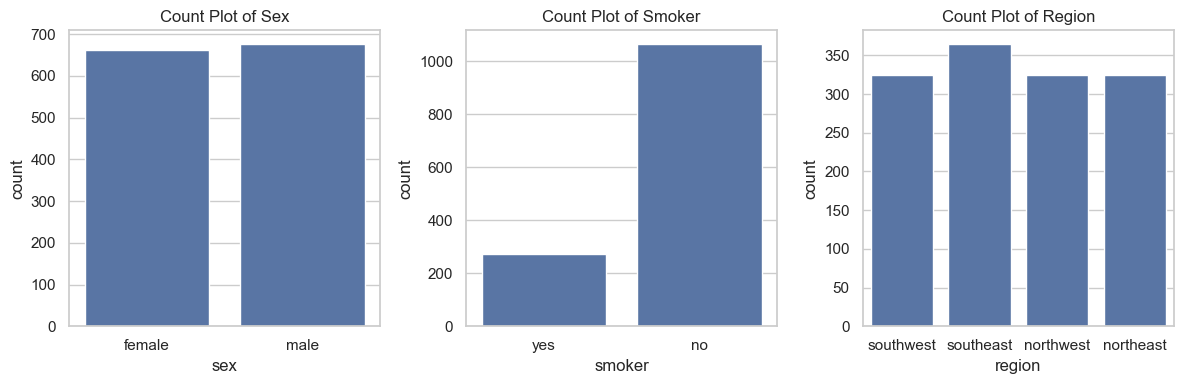

In [666]:
# Count plots for categorical features
plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col.capitalize()}")
plt.tight_layout()
plt.show()

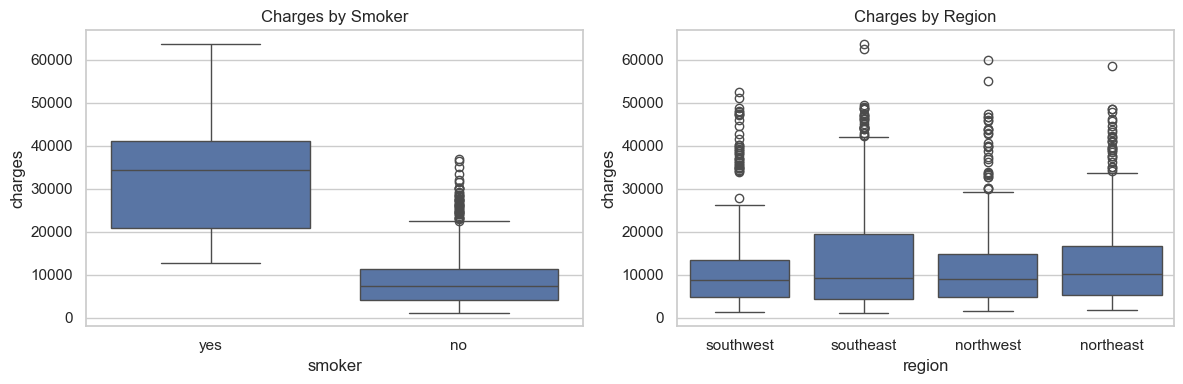

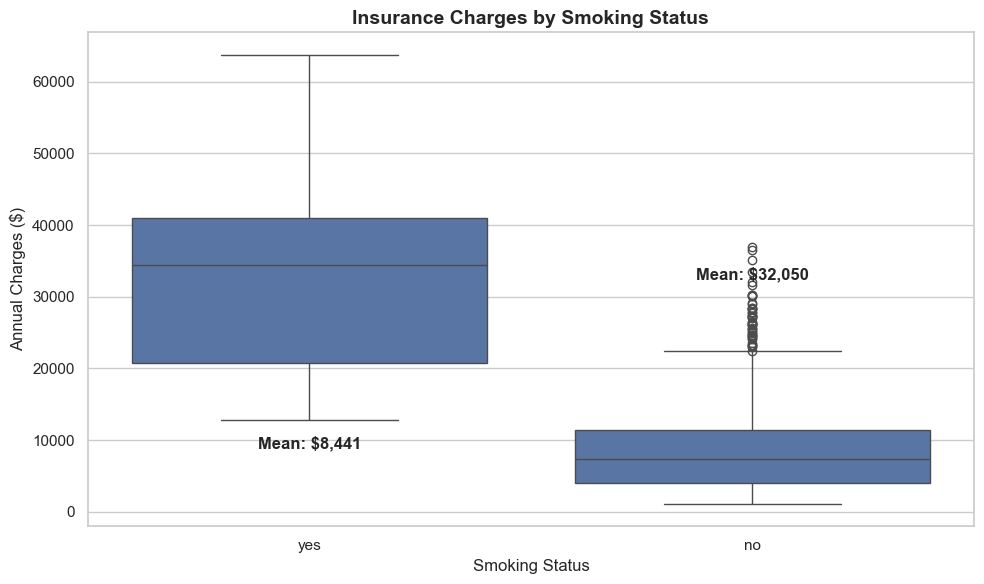

In [667]:
# Charges by smoker and region
plt.figure(figsize=(12, 4))
for i, col in enumerate(['smoker', 'region'], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f"Charges by {col.capitalize()}")
plt.tight_layout()
plt.show()

# Box plot of charges by smoker with mean annotations
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Insurance Charges by Smoking Status', fontsize=14, fontweight='bold')
plt.xlabel('Smoking Status')
plt.ylabel('Annual Charges ($)')
smoker_means = df.groupby('smoker')['charges'].mean()
for i, (status, mean_val) in enumerate(smoker_means.items()):
    plt.text(i, mean_val, f'Mean: ${mean_val:,.0f}',
             ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

### 6.3 Additional EDA

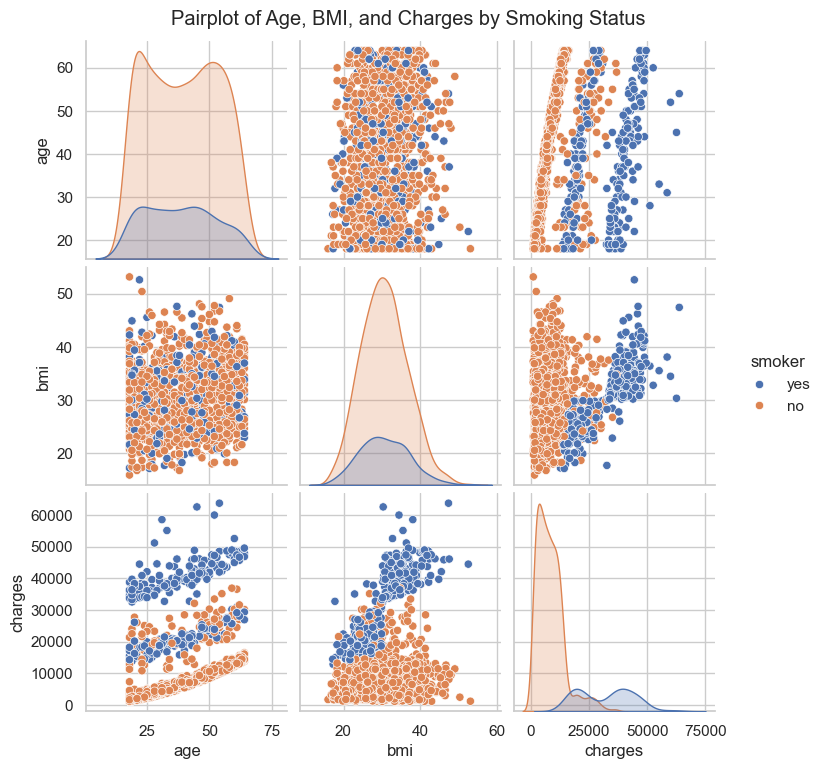

In [668]:
# 1. Pairplot for key variables by smoker status
sns.pairplot(
    df[['age', 'bmi', 'charges', 'smoker']],
    hue='smoker',
    diag_kind='kde'
)
plt.suptitle('Pairplot of Age, BMI, and Charges by Smoking Status', y=1.02)
plt.show()

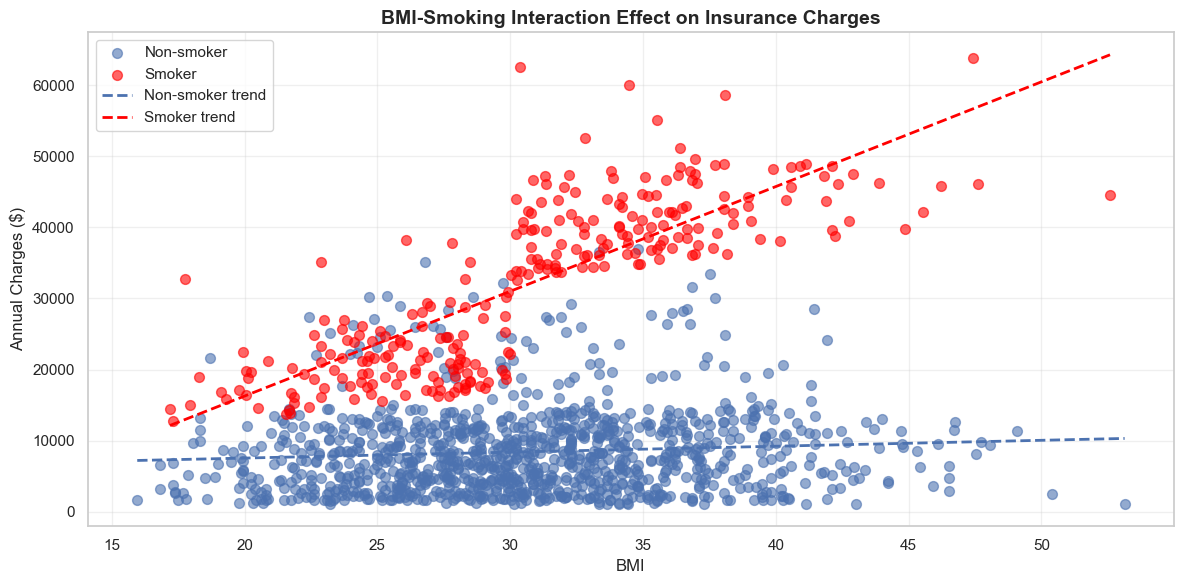

In [669]:
# BMI vs Charges by smoker with regression lines
plt.figure(figsize=(12, 6))

nonsmokers = df[df['smoker'] == 'no']
smokers = df[df['smoker'] == 'yes']

plt.scatter(
    nonsmokers['bmi'], nonsmokers['charges'],
    alpha=0.6, label='Non-smoker', s=50
)

plt.scatter(
    smokers['bmi'], smokers['charges'],
    alpha=0.6, label='Smoker', s=50, color='red'
)

# Regression line for non-smokers
slope_ns, intercept_ns, _, _, _ = stats.linregress(nonsmokers['bmi'], nonsmokers['charges'])
x_ns = np.linspace(nonsmokers['bmi'].min(), nonsmokers['bmi'].max(), 100)
plt.plot(x_ns, slope_ns * x_ns + intercept_ns, '--', linewidth=2, label='Non-smoker trend')

# Regression line for smokers
slope_s, intercept_s, _, _, _ = stats.linregress(smokers['bmi'], smokers['charges'])
x_s = np.linspace(smokers['bmi'].min(), smokers['bmi'].max(), 100)
plt.plot(x_s, slope_s * x_s + intercept_s, '--', linewidth=2, color='red', label='Smoker trend')

plt.xlabel('BMI', fontsize=12)
plt.ylabel('Annual Charges ($)', fontsize=12)
plt.title('BMI-Smoking Interaction Effect on Insurance Charges', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

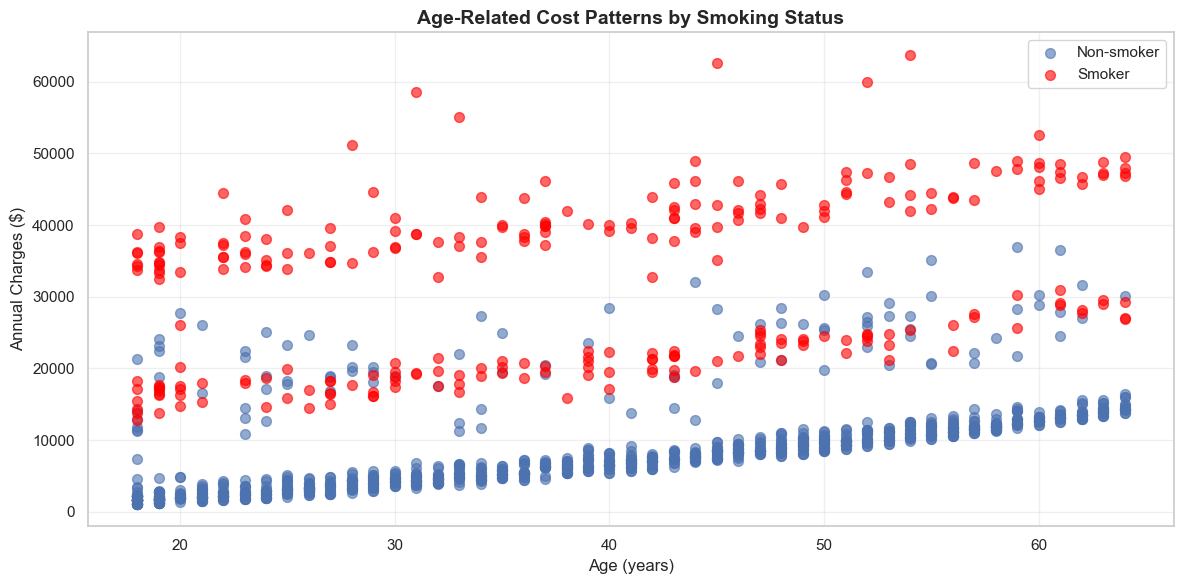

In [670]:
# Age vs Charges by smoker
plt.figure(figsize=(12, 6))

plt.scatter(
    nonsmokers['age'], nonsmokers['charges'],
    alpha=0.6, label='Non-smoker', s=50
)

plt.scatter(
    smokers['age'], smokers['charges'],
    alpha=0.6, label='Smoker', s=50, color='red'
)

plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Annual Charges ($)', fontsize=12)
plt.title('Age-Related Cost Patterns by Smoking Status', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [671]:
# Data preprocessing and feature engineering

# Reload the original data
df = pd.read_csv('../data/insurance.csv')

# Now encode
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
print(df_encoded.columns)

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


## Section 4. Analysis and Visualization

TODO: Remove this: This is a Markdown cell. 

TODO: Introduce your analysis and visualization processes in clear, organized sections. Most will use more than one section for this part - adjust your headings accordingly. 

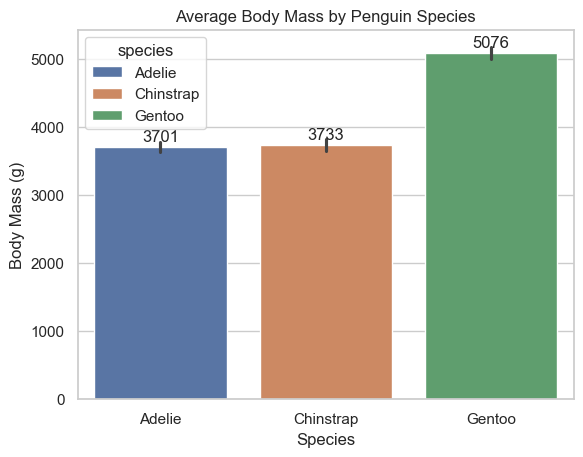

In [672]:
# This is a Python cell

# 1. Load a built-in dataset (many are available: 'penguins', 'tips', 'iris', 'flights', etc.)
df = sns.load_dataset("penguins")

# 2. Pick a built-in Seaborn theme for style
sns.set_theme(style="whitegrid")

# 3. Use Seaborn to create a bar chart, returns a set of axes
ax: Axes = sns.barplot(
    data=df,  # set chart data to our dataframe
    x="species",  # set chart x-axis to species column
    y="body_mass_g",  # set chart y-axis to body mass column
    hue="species",  # color by species
    palette="deep",  # choose a color palette (many built-in options available)
    legend="full",  # show full legend with all categories
)

# 4. Add numeric labels above each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=2)  # type: ignore

# 5. Add titles and labels
plt.title("Average Body Mass by Penguin Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.show()

## Section 5. Results and Conclusions

TODO: Remove this: This is a Markdown cell. At the end of your notebook, summarize practical insights gained from your analysis. Be specific, data-driven, and present what useful insights (based on specific results) your analysis has shown. Summarize for the reader so they don't have to review the entire analysis, but they can.

TODO: Summarize your specific results and conclusions clearly.
From the chart, we can see that Adelie and Chinstrap penguins have very similar average body mass, while the Gentoo penguins are noticeably heavier.  
On average, Gentoo penguins weigh roughly **20% more** than the other two species.  


## Before Committing: Finalize and Run All before sending to GitHub

TODO: Remove this whole cell or confirm that you have reviewed your notebook for quality. This is a Markdown cell. Before committing a notebook, use 'Run All' to generate all outputs and display them in the notebook. Verify everything looks right before using git add-commit-push to save your work to GitHub. Confirm title block and intro are good, section headings are clear, visuals have clear captions, labels, axes, units, and legends. Professional analysis skills and professional communication skills are critical. 
